In [6]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

Region-based Segmentation

In [7]:
image = plt.imread('1.jpeg')

In [10]:
image.shape

(192, 263, 3)

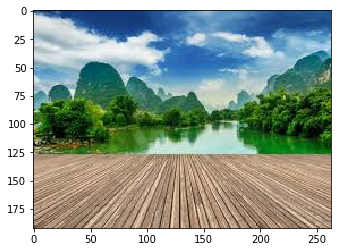

In [12]:
plt.imshow(image)

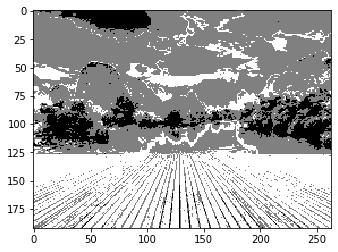

In [55]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
        
gray = gray_r.reshape(gray.shape[0], gray.shape[1])

plt.imshow(gray, cmap='gray')

Edge Detection

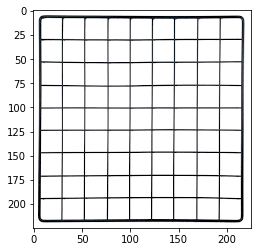

In [62]:
image = plt.imread('index.png')
plt.imshow(image)

In [63]:
gray = rgb2gray(image)

In [66]:
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])

In [69]:
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges


In [71]:
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [72]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

In [74]:
out_h

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

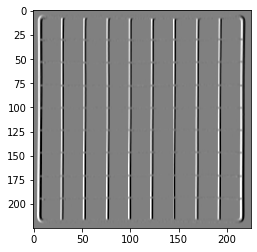

In [77]:
plt.imshow(out_v, cmap='gray')

In [80]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

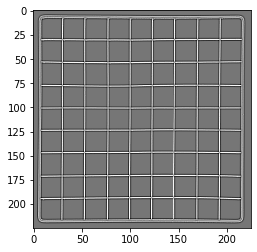

In [84]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

K-Means

(192, 263, 3)


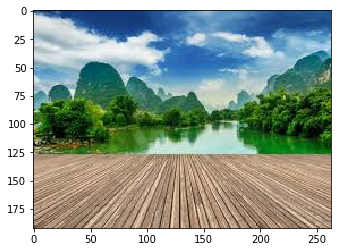

In [88]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [91]:
pic_r = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_r)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [105]:
pic2show.shape

(50496, 3)

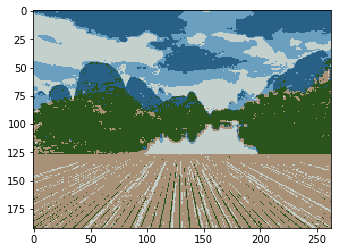

In [106]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)